**Titanic - Machine Learning from Disaster**


**Importing Data and Libraries**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the datasets
train= pd.read_csv('/content/drive/MyDrive/data/train.csv')
test= pd.read_csv('/content/drive/MyDrive/data/test.csv')
gender=pd.read_csv('/content/drive/MyDrive/data/gender_submission.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**Exploratory Data Analsysis**

statistical information and datatypes

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


checking missing values

In [12]:
train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

print("Missing values in training set:")
print(train_missing[train_missing > 0])

print("\nMissing values in test set:")
print(test_missing[test_missing > 0])

Missing values in training set:
Age         177
Cabin       687
Embarked      2
dtype: int64

Missing values in test set:
Age       86
Fare       1
Cabin    327
dtype: int64


visualizing the missing values

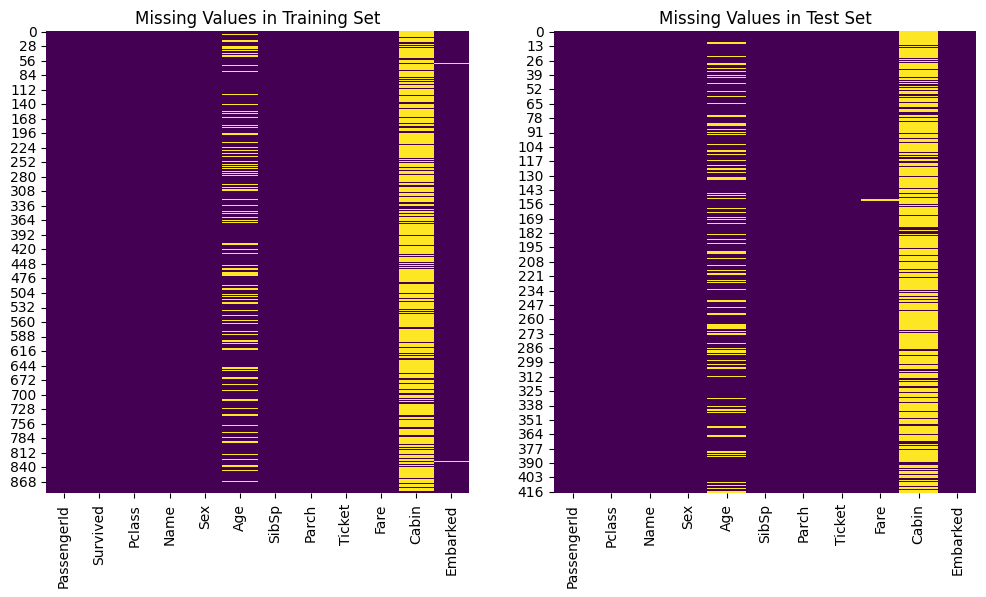

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Set')

plt.show()

Further analyzing categorical and numerical features

---



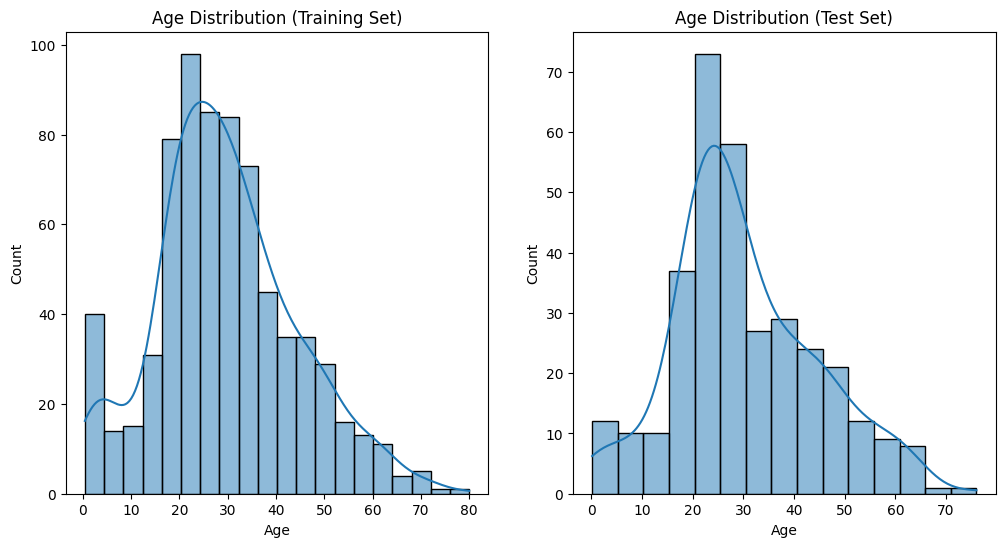

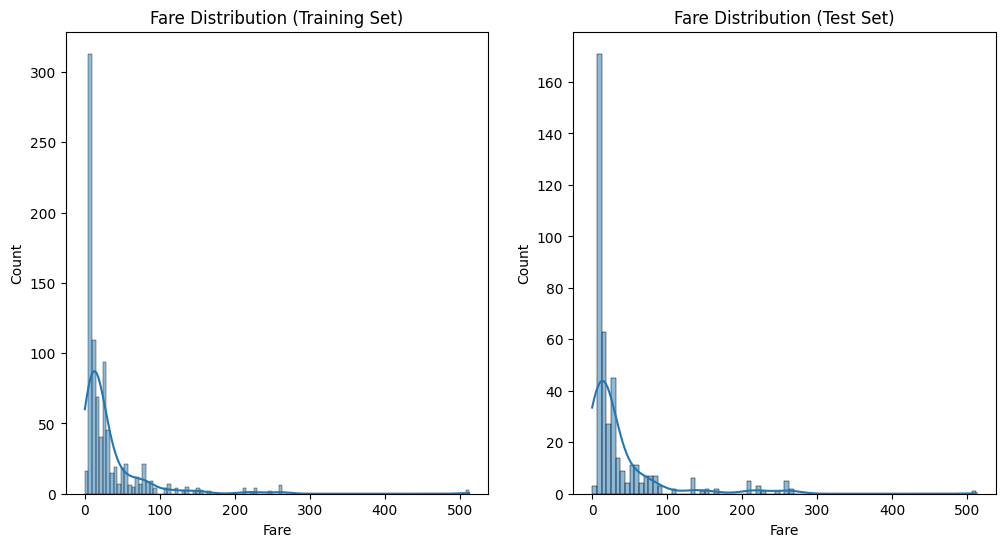

In [14]:
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age Distribution (Training Set)')

plt.subplot(1, 2, 2)
sns.histplot(test['Age'].dropna(), kde=True)
plt.title('Age Distribution (Test Set)')

plt.show()

plt.figure(figsize=(12, 6))

# Fare Distribution
plt.subplot(1, 2, 1)
sns.histplot(train['Fare'], kde=True)
plt.title('Fare Distribution (Training Set)')

plt.subplot(1, 2, 2)
sns.histplot(test['Fare'].dropna(), kde=True)
plt.title('Fare Distribution (Test Set)')

plt.show()


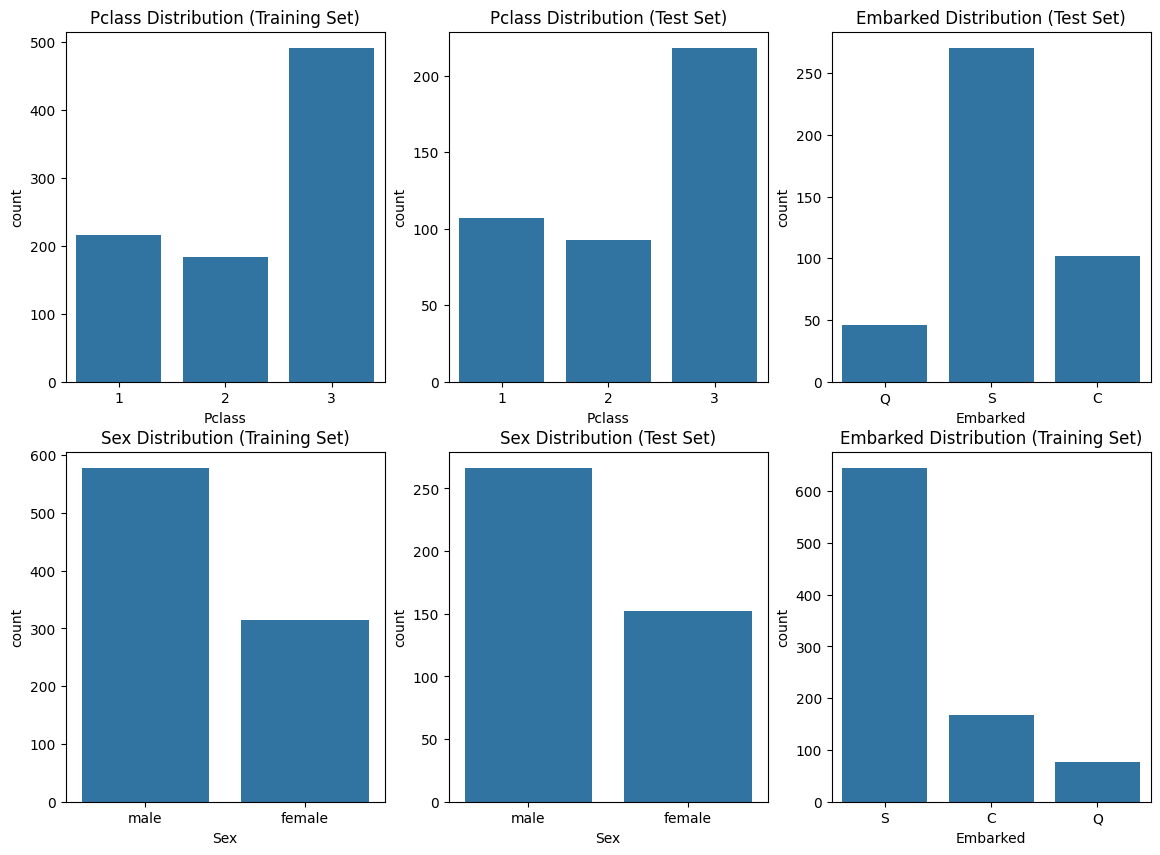

In [15]:
plt.figure(figsize=(14, 10))

#PClass
plt.subplot(2, 3, 1)
sns.countplot(x='Pclass', data=train)
plt.title('Pclass Distribution (Training Set)')

plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', data=test)
plt.title('Pclass Distribution (Test Set)')

# Sex
plt.subplot(2, 3, 4)
sns.countplot(x='Sex', data=train)
plt.title('Sex Distribution (Training Set)')

plt.subplot(2, 3, 5)
sns.countplot(x='Sex', data=test)
plt.title('Sex Distribution (Test Set)')

# Embarked
plt.subplot(2, 3, 6)
sns.countplot(x='Embarked', data=train)
plt.title('Embarked Distribution (Training Set)')

plt.subplot(2, 3, 3)
sns.countplot(x='Embarked', data=test)
plt.title('Embarked Distribution (Test Set)')


plt.show()


Survival Rate

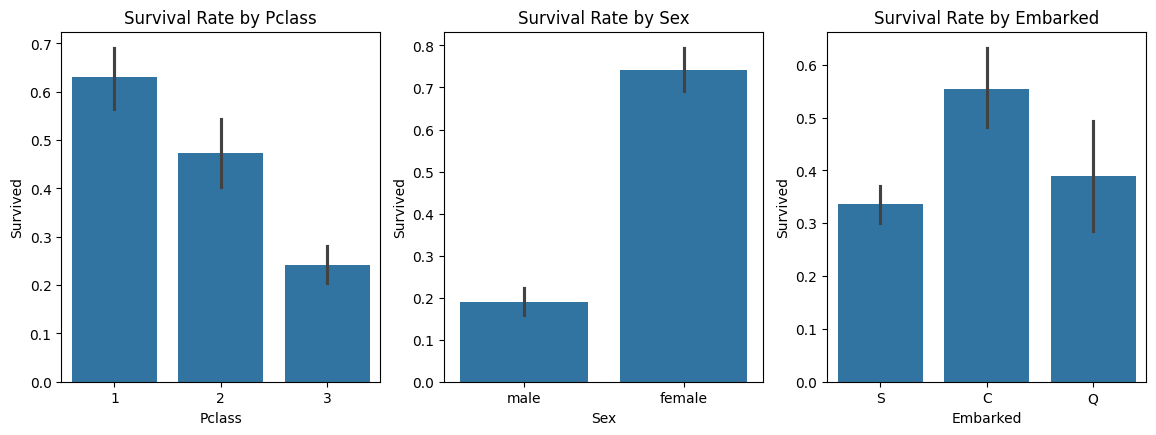

In [16]:
plt.figure(figsize=(14, 10))

# Survival Rate by Pclass
plt.subplot(2, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Pclass')

# Survival Rate by Sex
plt.subplot(2, 3, 2)
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')

# Survival Rate by Embarked
plt.subplot(2, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarked')

plt.show()


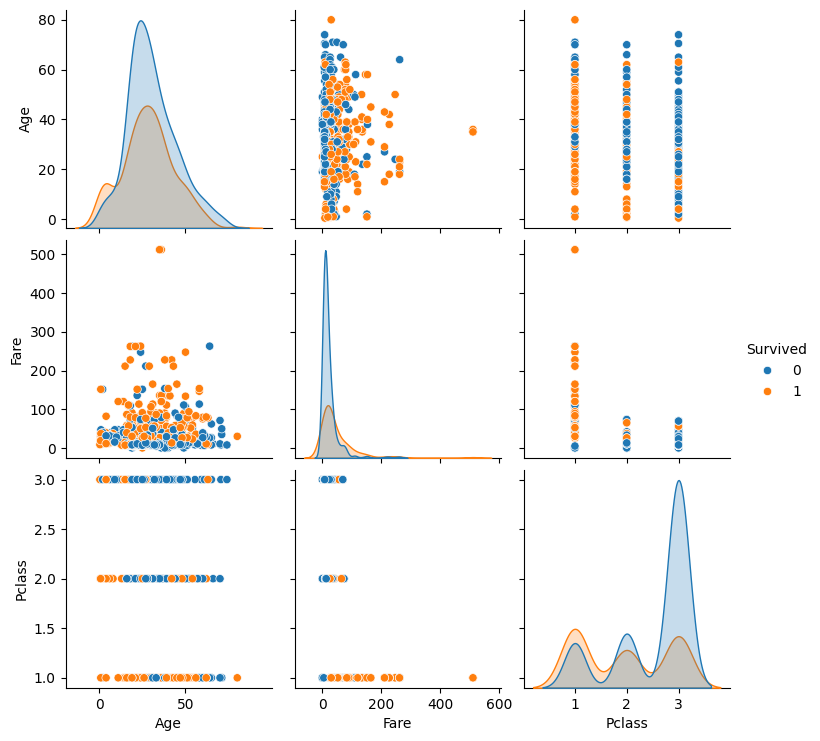

In [17]:
# Visualising survival rates
sns.pairplot(train, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.show()


Correlation Matrix

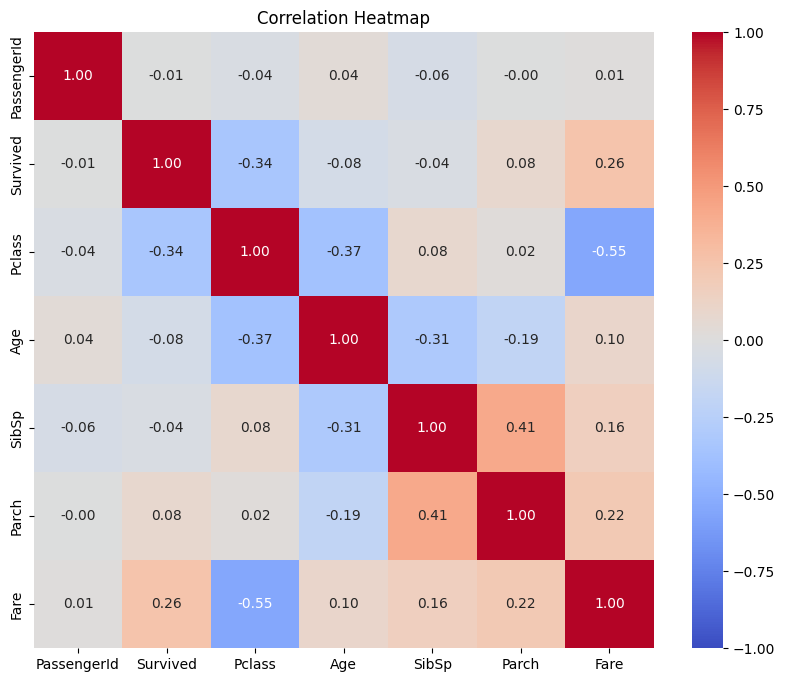

In [18]:
# Calculating the correaltion
# Select only numerical columns for correlation calculation
numerical_columns = train.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()

# Plottting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

**Data Preprocessing**

Handling missing values

In [19]:
age_imputer = SimpleImputer(strategy='median')
train['Age'] = age_imputer.fit_transform(train[['Age']])

# Droping the cabin column due to excessive missing values
try:
    train = train.drop(columns=['Cabin'])
except KeyError:
    print("The 'Cabin' column has already been removed.")

embarked_imputer = SimpleImputer(strategy='most_frequent')
train['Embarked'] = embarked_imputer.fit_transform(train[['Embarked']]).ravel()


test['Age'] = age_imputer.transform(test[['Age']])

fare_imputer = SimpleImputer(strategy='median')
test['Fare'] = fare_imputer.fit_transform(test[['Fare']])

test= test.drop(columns=['Cabin'])

In [20]:
#Encoding Categorical Features

from sklearn.preprocessing import OneHotEncoder

train = train.drop(columns=['Name', 'Ticket'])
test = test.drop(columns=['Name', 'Ticket'])

# One-hot encoding categorical variables
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
testf = pd.get_dummies(test, columns=['Sex', 'Embarked'])

# Ensuring that both datasets have the same dummy variables
train, test= train.align(test, join='left', axis=1, fill_value=0)


In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [27]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)


Train columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
Test columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


Feature Engineering

In [29]:
# Create new feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [30]:
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

train['AgeBin'] = pd.cut(train['Age'], bins=bins, labels=labels)
test['AgeBin'] = pd.cut(test['Age'], bins=bins, labels=labels)

# One-hot encode
train = pd.get_dummies(train, columns=['AgeBin'])
test = pd.get_dummies(test, columns=['AgeBin'])



In [31]:

train, test = train.align(test, join='left', axis=1, fill_value=0)

In [32]:
print("Final Train DataFrame head:")
print(train.head())

print("Final Test DataFrame head:")
print(test.head())


Final Train DataFrame head:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500       False   
1            2         1       1  38.0      1      0  71.2833        True   
2            3         1       3  26.0      0      0   7.9250        True   
3            4         1       1  35.0      1      0  53.1000        True   
4            5         0       3  35.0      0      0   8.0500       False   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  FamilySize  AgeBin_Child  \
0      True       False       False        True           2         False   
1     False        True       False       False           2         False   
2     False       False       False        True           1         False   
3     False       False       False        True           2         False   
4      True       False       False        True           1         False   

   AgeBin_Teenager  AgeBin_Young Adult  AgeBin

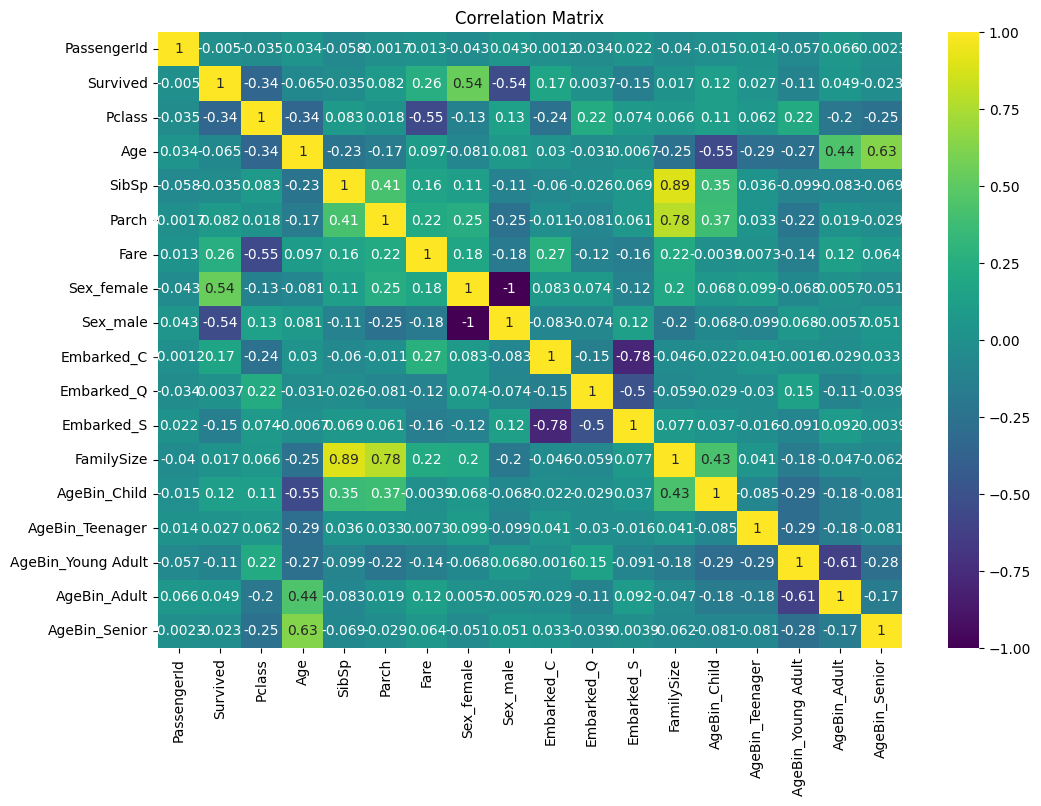

In [35]:
#Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

**Modelling and Predictions**

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [38]:
# Separating the features and target class
X = train.drop(columns=['PassengerId', 'Survived'])
y = train['Survived']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


LR

In [39]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

RF

In [40]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

GB

In [41]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

SVC

In [42]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Model Evaluation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



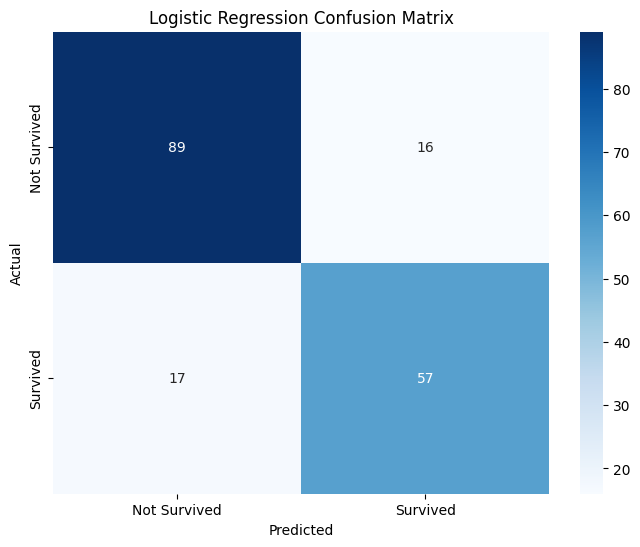

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



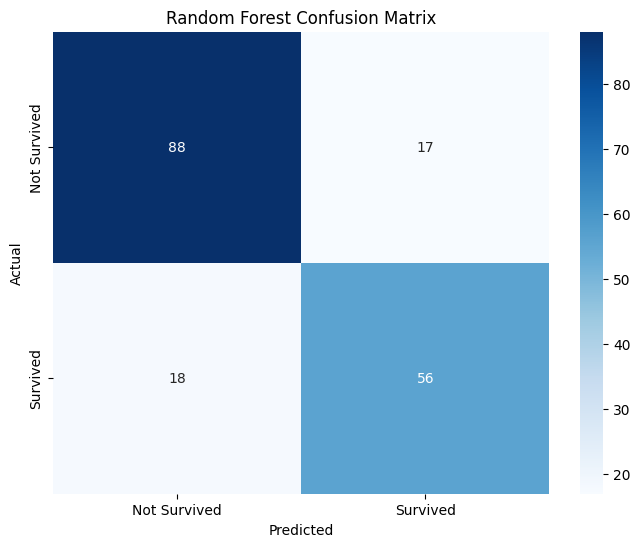

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



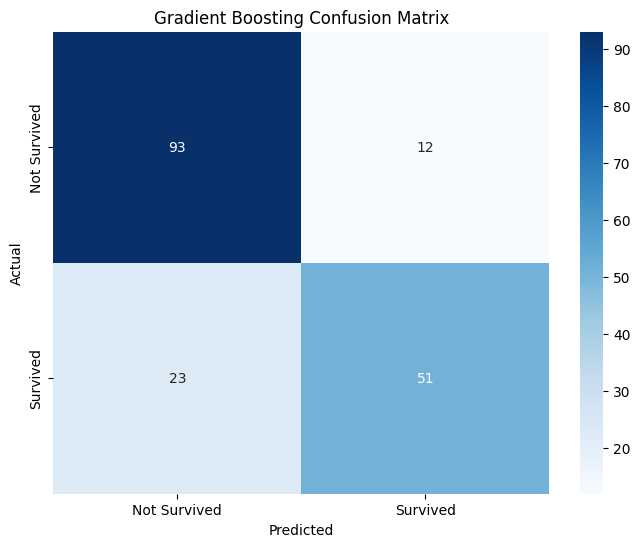

Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



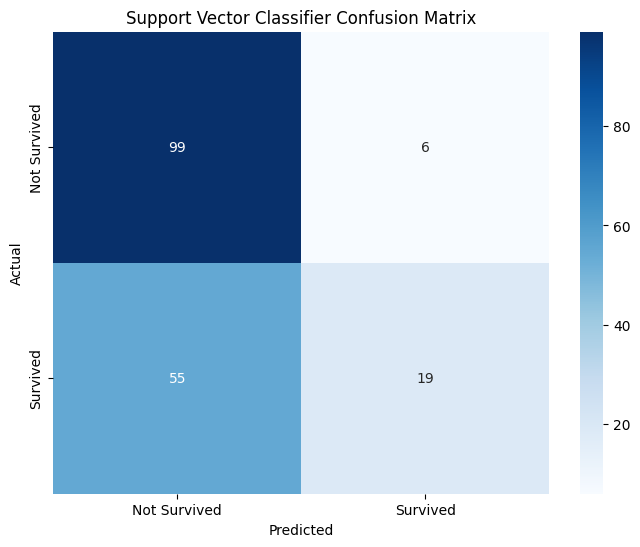

In [43]:
def evaluate_model(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluating all the models
evaluate_model(logreg, X_val, y_val, 'Logistic Regression')
evaluate_model(rf, X_val, y_val, 'Random Forest')
evaluate_model(gb, X_val, y_val, 'Gradient Boosting')
evaluate_model(svc, X_val, y_val, 'Support Vector Classifier')


Comapartive Analysis

<Figure size 1200x800 with 0 Axes>

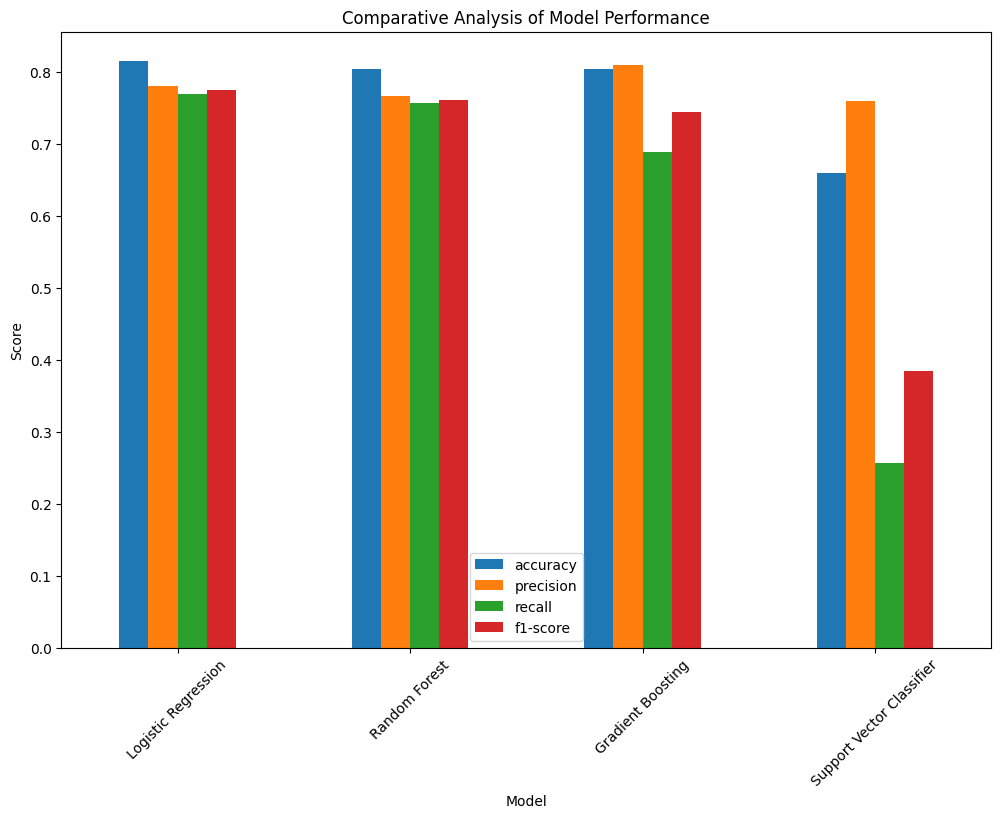

In [44]:
def get_model_metrics(model, X_val, y_val):
    y_pred = model.predict(X_val)
    report = classification_report(y_val, y_pred, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    }

# Metrics for all models
metrics = {
    'Logistic Regression': get_model_metrics(logreg, X_val, y_val),
    'Random Forest': get_model_metrics(rf, X_val, y_val),
    'Gradient Boosting': get_model_metrics(gb, X_val, y_val),
    'Support Vector Classifier': get_model_metrics(svc, X_val, y_val)
}


metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df.sort_values(by='f1-score', ascending=False)

# Plotting the comparative analysis
plt.figure(figsize=(12, 8))
metrics_df[['accuracy', 'precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8))
plt.title('Comparative Analysis of Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


Prediction on test set

In [48]:
# Selecting the best model which in this case is Logistic Regression
best_model = logreg

X_test = test.drop(columns=['PassengerId', 'Survived'])

# Making predictions
test_predictions = best_model.predict(X_test)

# Saving the predictions to a CSV file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)


**SHAP AND LIME**

focus on analyzing the features' input-output pair

In [49]:
pip install lime shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=62c6d22481a40ca6a62080562893d10628518b1b7bc89afcf186c753db35188b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [50]:
import lime
import lime.lime_tabular
import shap

In [51]:
# Prepare data for LIME
feature_names = X.columns.tolist()
X_train_lime = X_train.values
y_train_lime = y_train.values

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_lime,
    feature_names=feature_names,
    class_names=['Not Survived', 'Survived'],
    mode='classification'
)


In [52]:
# Choose a sample instance for explanation (e.g., index 0)
idx = 0
instance = X_val.iloc[idx].values

# Explain the instance
explanation = explainer.explain_instance(instance, best_model.predict_proba, num_features=10)

# Display the explanation
print(explanation.as_list())

# Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False)


[('0.00 < Sex_male <= 1.00', -0.2486141523432928), ('Sex_female <= 0.00', -0.24393341270290964), ('2.00 < Pclass <= 3.00', -0.2254582443566741), ('FamilySize > 2.00', -0.16150435766731022), ('AgeBin_Teenager <= 0.00', 0.15196177313975032), ('AgeBin_Child <= 0.00', -0.11119480330356739), ('AgeBin_Senior <= 0.00', -0.10928923653816604), ('0.00 < AgeBin_Young Adult <= 1.00', -0.08740676612692258), ('Embarked_S <= 0.00', 0.04991798316366033), ('AgeBin_Adult <= 0.00', -0.04343659138398706)]


SHAP

In [53]:
# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train)

# Compute SHAP values for the validation set
shap_values = explainer(X_val)


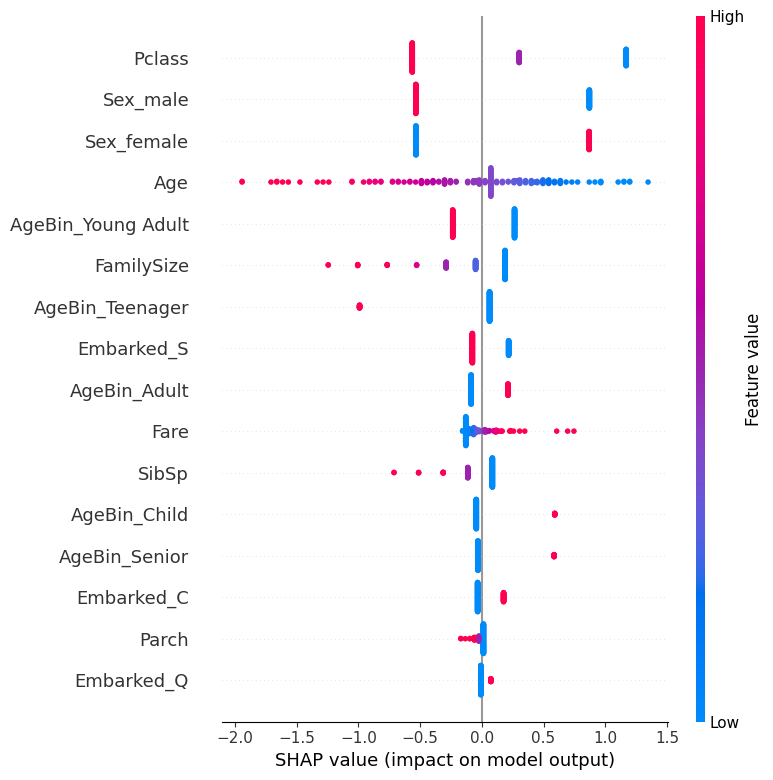

In [58]:
# Extract the raw SHAP values from the Explanation object
shap_array = shap_values.values

# Convert shap_array to numeric type, handling potential errors
shap_array_numeric = np.zeros_like(shap_array, dtype=float)
for i in range(shap_array.shape[0]):
    for j in range(shap_array.shape[1]):
        try:
            shap_array_numeric[i, j] = float(shap_array[i, j])
        except:
            shap_array_numeric[i, j] = 0  # Or any other suitable default value

# Now check for non-finite values and handle them
shap_values_finite = np.where(np.isfinite(shap_array_numeric), shap_array_numeric, 0)

# Plot summary plot with adjusted SHAP values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_finite, X_val, feature_names=feature_names)


In [59]:
# Visualize SHAP values for a single instance
shap.initjs()
idx = 0  # Choose an instance index
shap.force_plot(explainer.expected_value, shap_values[idx].values, X_val.iloc[idx], feature_names=feature_names)
